In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils

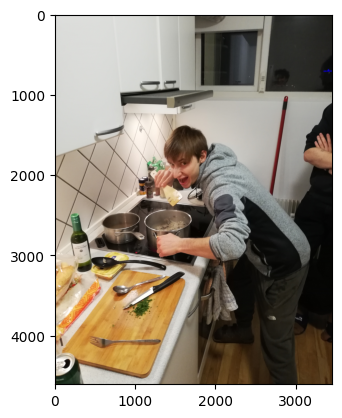

In [2]:
im = cv2.imread("sirio.jpg")
im = im[:,:,::-1]
plt.imshow(im)

In [3]:
import itertools as it
def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

In [4]:
points = np.random.rand(4, 5)

print(points)
print()

points = utils.Pi(points)

print(points)
print()

points = utils.PiInv(points)
print(points)

[[0.81054879 0.40326623 0.90755134 0.79175021 0.76260115]
 [0.62359171 0.57313282 0.79048218 0.82897334 0.96822148]
 [0.24856844 0.23832225 0.08877658 0.39182326 0.20172621]
 [0.25493075 0.76624044 0.02835173 0.54838587 0.69584598]]

[[ 3.17948611  0.52629202 32.0104447   1.44378303  1.09593382]
 [ 2.44612194  0.74798038 27.88127245  1.51166066  1.39143073]
 [ 0.97504297  0.31102803  3.13125837  0.71450284  0.28990066]]

[[ 3.17948611  0.52629202 32.0104447   1.44378303  1.09593382]
 [ 2.44612194  0.74798038 27.88127245  1.51166066  1.39143073]
 [ 0.97504297  0.31102803  3.13125837  0.71450284  0.28990066]
 [ 1.          1.          1.          1.          1.        ]]


(2, 240)


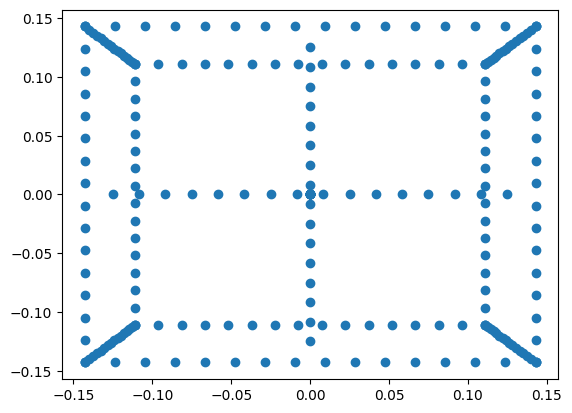

In [5]:
K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
t = np.array([[0, 0, 4]])
Q = box3d()

proj = utils.projectpoints(K, R, t, Q)
print(proj.shape)
plt.scatter(proj[0], proj[1], marker='o')
plt.show()

In [6]:
import math
def makeR(alpha):
    alpha = alpha/180*math.pi
    return np.array([[math.cos(alpha), 0, math.sin(alpha)],
                     [0, 1, 0],
                     [-math.sin(alpha), 0, math.cos(alpha)]])

(2, 240)


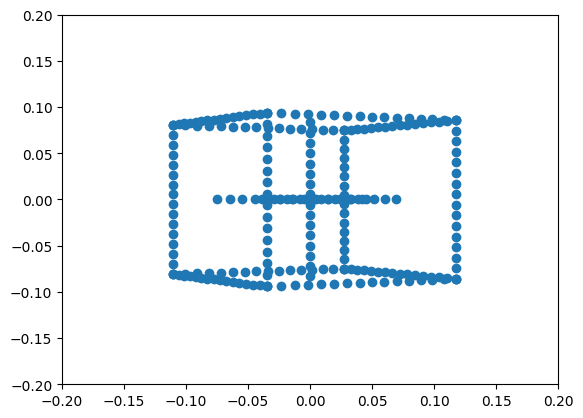

In [13]:
R = makeR(60)
t = np.array([[0, 0, 6]])
proj = utils.projectpoints(K, R, t, Q)
print(proj.shape)
plt.scatter(proj[0], proj[1], marker='o')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.show()